In [1]:
# importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


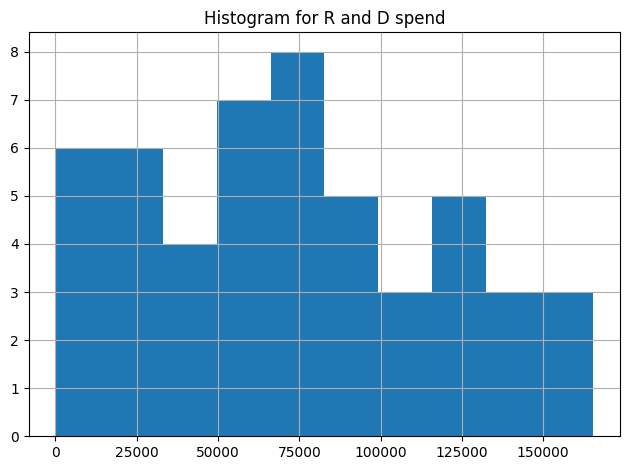

In [5]:
df['R&D Spend'].hist()
plt.title('Histogram for R and D spend')
plt.tight_layout()
plt.show()

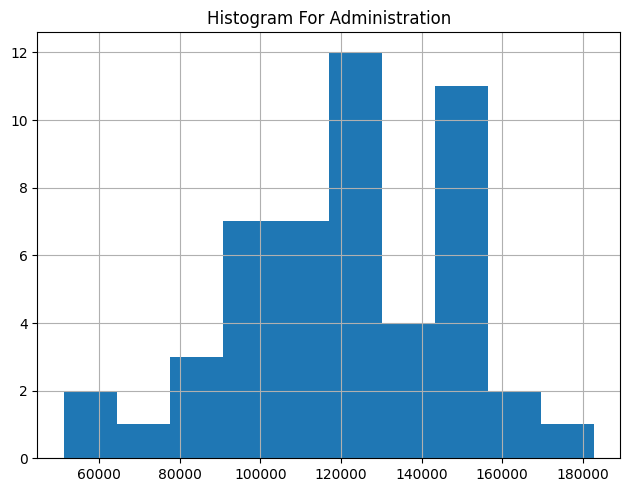

In [6]:
df['Administration'].hist()
plt.tight_layout()
plt.title('Histogram For Administration')
plt.show()

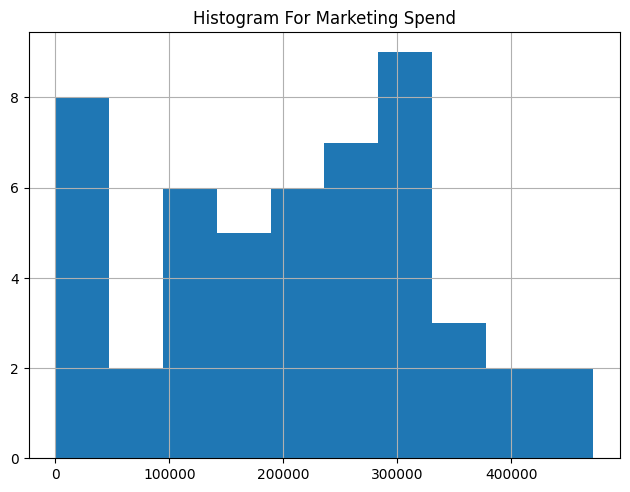

In [7]:
df['Marketing Spend'].hist()
plt.tight_layout()
plt.title('Histogram For Marketing Spend')
plt.show()

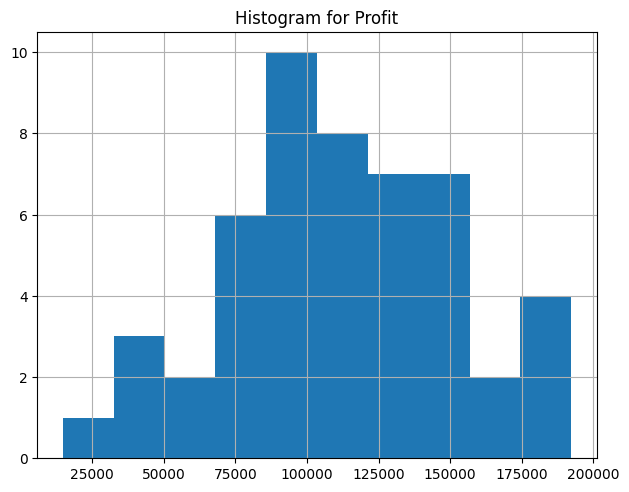

In [8]:
df['Profit'].hist()
plt.tight_layout()
plt.title('Histogram for Profit')
plt.show()

As seen from above histogram of profit, I am more confident that the next profit will from range 75000 to 125000.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
state_count = df['State'].value_counts()

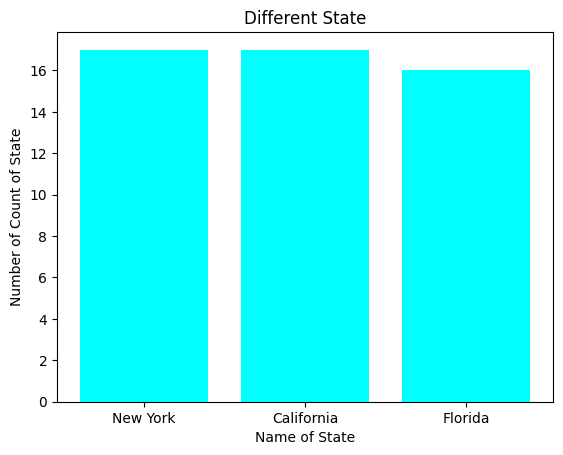

In [12]:
plt.bar(state_count.index,state_count.values,color='cyan')
plt.title('Different State')
plt.xlabel('Name of State')
plt.ylabel('Number of Count of State')
plt.show()

In [13]:
# splitting the dataset into target and variables in array
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
X[:10]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California']], dtype=object)

In [15]:
y[:10]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96])

In [16]:
# One Hot Encoding the categorical values
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
X[:10]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

In [18]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# Feature Scaling
scaler = StandardScaler()
X_train[:,3:] = scaler.fit_transform(X_train[:,3:])
X_test[:,3:] = scaler.transform(X_test[:,3:])

In [20]:
X_train[:10]

array([[0.0, 1.0, 0.0, 0.3420214917054793, 0.2278767782056234,
        0.12425037675982561],
       [0.0, 1.0, 0.0, 1.3620784917345992, -1.097473695438894,
        1.1499068756530315],
       [1.0, 0.0, 0.0, -0.7108129728948954, -2.5770185976138653,
        -0.3413682525763912],
       [0.0, 0.0, 1.0, 0.9061143813653676, 1.0172367029234282,
        0.6689018532376049],
       [0.0, 0.0, 1.0, 1.409970875138404, -0.09115402570882848,
        1.300068606323669],
       [1.0, 0.0, 0.0, 1.2036710299893565, 0.9611633188437886,
        -0.9524878432853034],
       [0.0, 1.0, 0.0, -1.0528582620448337, -1.3439253815580903,
        -0.6284338875289133],
       [0.0, 1.0, 0.0, -1.614809064545102, -0.19649413840893654,
        0.541067677988688],
       [1.0, 0.0, 0.0, -1.6426230017180679, 0.5269144150253678,
        -2.0785493496354306],
       [0.0, 0.0, 1.0, 0.7788512303841642, 0.054370512118348015,
        0.22949540030789972]], dtype=object)

In [21]:
# Training the model on Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(X_test)
result = np.column_stack((y_test,y_pred))
print(result[:])

[[134307.35       126362.87908252]
 [ 81005.76        84608.45383643]
 [ 99937.59        99677.49425155]
 [ 64926.08        46357.46068582]
 [125370.37       128750.48288497]
 [ 35673.41        50912.41741905]
 [105733.54       109741.350327  ]
 [107404.34       100643.24281644]
 [ 97427.84        97599.275746  ]
 [122776.86       113097.42524437]]


In [23]:
# Evaluating the model
from sklearn.metrics import mean_squared_error
print(f'Mean Square Error {mean_squared_error(y_test,y_pred)}')

Mean Square Error 82010363.0450134
